# 1.	Chargement des données

In [25]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import matplotlib.pyplot as plt

In [2]:
max_features = 10000  # Limiter le nombre de mots uniques à 10 000
maxlen = 500  # Longueur maximale des séquences (tronquer/pader)

In [3]:
# Charger les données
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# Tronquer ou pader les séquences pour qu'elles aient la même longueur
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [50]:
# Récupérer l'index des mots
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Décoder une séquence de critique en texte
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

decode_review(x_train[10])

"? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? french horror cinema has seen something of a revival over the last couple of years with great films such as inside and ? romance ? on to the scene ? ? the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made ? was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is ? by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named ? sent to prison for fraud he is put in a cell with three others the quietly insane ? body building ? marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old ? after ? part of it they soon realise its mag

In [12]:
# Affichage données
print("Exemple d'une critique encodée :", x_train[0])
print("Étiquette associée :", y_train[0])  # 0 = négatif, 1 = positif

Exemple d'une critique encodée : [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    

# 2.	Construction du Modèle RNN :

In [20]:
# Construction du modèle
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=500))
model.add(SimpleRNN(128, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

In [21]:
# Afficher le résumé du modèle
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# 3.	Compilation du Modèle:

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 4.	Entraînement du Modèle

In [24]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 220ms/step - accuracy: 0.5401 - loss: 0.6839 - val_accuracy: 0.5940 - val_loss: 0.6511
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 134s 215ms/step - accuracy: 0.6554 - loss: 0.6184 - val_accuracy: 0.6178 - val_loss: 0.6493
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 215ms/step - accuracy: 0.7158 - loss: 0.5458 - val_accuracy: 0.6616 - val_loss: 0.6266
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 139s 211ms/step - accuracy: 0.7846 - loss: 0.4515 - val_accuracy: 0.7274 - val_loss: 0.5724
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 136s 218ms/step - accuracy: 0.8533 - loss: 0.3399 - val_accuracy: 0.7474 - val_loss: 0.5741
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 137s 220ms/step - accuracy: 0.8913 - loss: 0.2670 - val_accuracy: 0.7210 - val_loss: 0.6580
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 219ms/step - accuracy: 0.9085 - loss: 0.2381 - val_accuracy: 0.7714 - val_loss: 0.5965
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 212ms/step - accuracy: 0.8919 -

# 5.	Évaluation du Modèle

In [30]:
# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Affichage des résultats
print(f"Perte (Loss) sur les données de test : {test_loss}")
print(f"Précision (Accuracy) sur les données de test : {test_accuracy}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.7500 - loss: 0.7473
Perte (Loss) sur les données de test : 0.7413244247436523
Précision (Accuracy) sur les données de test : 0.7510799765586853


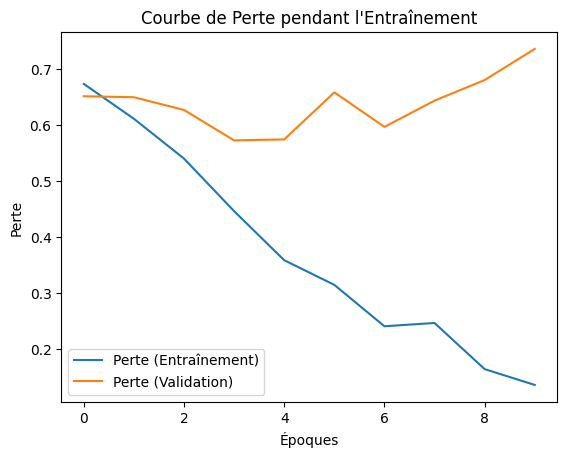

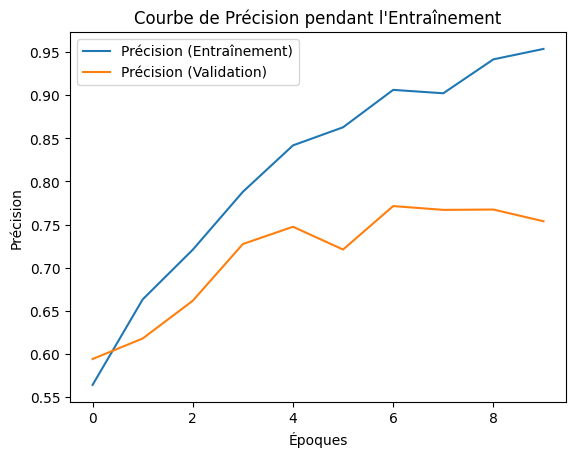

In [31]:
# Courbe de Perte (Loss)
plt.plot(history.history['loss'], label='Perte (Entraînement)')
plt.plot(history.history['val_loss'], label='Perte (Validation)')
plt.title('Courbe de Perte pendant l\'Entraînement')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

# Courbe de Précision (Accuracy)
plt.plot(history.history['accuracy'], label='Précision (Entraînement)')
plt.plot(history.history['val_accuracy'], label='Précision (Validation)')
plt.title('Courbe de Précision pendant l\'Entraînement')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.show()

In [32]:
# Faire des prédictions sur les données de test
predictions = model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step


In [51]:
# Convertir les probabilités en étiquettes binaires
predicted_labels = (predictions > 0.5).astype(int)

# Définir l'index de la critique pour laquelle on veut prédire
index = 10  # Change cet index pour choisir une autre critique

# Décoder la critique pour la lire (optionnel)
decoded_review = decode_review(x_test[index])
print(f"Critique décodée :\n{decoded_review}")

# Faire la prédiction pour la critique sélectionnée
predicted_sentiment = model.predict(x_test[index:index+1])  # Récupérer la prédiction pour une critique

# Afficher la prédiction
print(f"Score de prédiction : {predicted_sentiment[0][0]:.4f}")

# Interpréter le résultat (positif ou négatif)
if predicted_sentiment[0][0] > 0.5:
    print("Sentiment prédit : Positif")
else:
    print("Sentiment prédit : Négatif")


Critique décodée :
? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? inspired by hitchcock's strangers on a train concept of two men ? murders in exchange for getting rid of the two people messing up their lives throw ? from the train is an original and very inventive comedy take on the idea it's a credit to danny ? that he both wrote and starred in this minor comedy gem br br anne ? is the mother who ? the film's title and it's understandable why she gets under